In [1]:
#Importing all the required modules
import pandas as pd
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.utils import to_categorical
from keras import backend as k
k.set_image_dim_ordering('th')
from matplotlib import pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
#Loading Alphabet and Digit Data
data=pd.read_csv("A_Z Handwritten Data.csv",header=None)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_mnist_data=np.concatenate((X_train,X_test))
y_mnist_data=np.concatenate((y_train,y_test))

In [3]:
#Formatting and Merging both DataSet
X=data.iloc[:,1:].values
y=data.iloc[:,0].values

y=y+10

X_reshaped=X.reshape(X.shape[0],28,28)
X_complete=np.concatenate((X_mnist_data,X_reshaped))
y_complete=np.concatenate((y_mnist_data,y))

In [4]:
#Complete dataset shape
print(X_complete.shape)
print(y_complete.shape)

(442451, 28, 28)
(442451,)


In [5]:
#Categories
print(set(y_complete))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35}


In [6]:
def convert_to_char(x):
    if x<10:
        char=chr(x+48)
    else:
        char=chr(x+55)
    
    return char

In [7]:
#Creating Data Distribution DataFrame 
y_info_df=pd.DataFrame(y_complete,columns=['enc_label'])
df=y_info_df['enc_label'].value_counts().sort_index().to_frame()
df.reset_index(inplace=True)
df['label']=df['index'].apply(lambda x:convert_to_char(x))
df.columns=['enc_label','counts','label']
df=df[['enc_label','label','counts']]
df

,enc_label,label,counts
0,0,0,6903
1,1,1,7877
2,2,2,6990
3,3,3,7141
4,4,4,6824
5,5,5,6313
6,6,6,6876
7,7,7,7293
8,8,8,6825
9,9,9,6958


In [8]:
#Normalizing Data and reshaping for Keras
X_norm=X_complete/255
X_norm=X_norm.reshape(X_norm.shape[0],1,28,28)

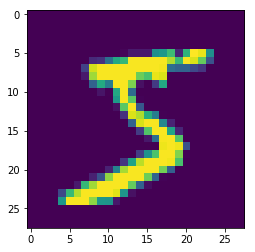

In [9]:
plt.imshow(X_norm[0][0])

In [10]:
y_cat=to_categorical(y_complete)

In [11]:
X_norm.shape

(442451, 1, 28, 28)

In [12]:
y_cat.shape

(442451, 36)

In [13]:
model=Sequential()
model.add(Conv2D(30,5,5,input_shape=(1,28,28),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(15,5,5,activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(y_cat.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

C:\Users\suraj\Anaconda3\envs\DL\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(30, (5, 5), input_shape=(1, 28, 28..., activation="relu")`
  
C:\Users\suraj\Anaconda3\envs\DL\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (5, 5), activation="relu")`
  after removing the cwd from sys.path.


In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 24, 24)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 12, 12)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 8, 8)          11265     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 4, 4)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 240)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               61696     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
__________

In [19]:
model.fit(X_norm,y_cat,epochs=3)

Epoch 1/3
442451/442451 [==============================] - 153s 347us/step - loss: 0.1797 - acc: 0.9477
Epoch 2/3
442451/442451 [==============================] - 141s 318us/step - loss: 0.0859 - acc: 0.9748
Epoch 3/3
442451/442451 [==============================] - 138s 313us/step - loss: 0.0668 - acc: 0.9800


In [20]:
model.predict_classes(X_norm[350000:350001])

array([28], dtype=int64)

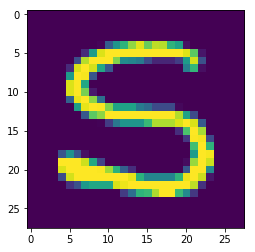

In [21]:
plt.imshow(X_norm[350000:350001][0][0])